In [ ]:
Q-1. Imagine you have a dataset where you have different Instagram features
like username , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is
to predict the number of likes and Time Since posted and the rest of the features are
your input features. Now you have to build a model which can predict the
number of likes and Time Since posted.
Dataset This is the Dataset You can use this dataset for this question.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import warnings
warnings.filterwarnings('ignore')

from numpy import absolute
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from xgboost import XGBRegressor

from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer      #Handling Missing Values
from sklearn.preprocessing import StandardScaler   #Handling Feature Scaling
from sklearn.preprocessing import OneHotEncoder   #Ordinal Encoding
#pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

In [45]:
df = pd.read_csv(r"C:\Users\aru78\INEURON DATA\EDA Collection\instagram_reach.csv",index_col=0)

In [46]:
df

,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...
8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 12
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   S.No               100 non-null    int64 
 1   USERNAME           100 non-null    object
 2   Caption            94 non-null     object
 3   Followers          100 non-null    int64 
 4   Hashtags           100 non-null    object
 5   Time since posted  100 non-null    object
 6   Likes              100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 6.2+ KB


In [48]:
df_copy=df.copy()

In [49]:
df_copy.shape

(100, 7)

In [50]:
df_copy.isnull().sum()

S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [51]:
#No missing values found in the dataset

In [52]:
df_copy.duplicated().sum()

0

In [53]:
#No duplicated records found in the dataset

In [54]:
df_copy.columns

Index(['S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [55]:
#Lets drop id column as it is not important for predicting the price 
df_copy = df_copy.drop(labels =['S.No'],axis=1)

In [56]:
df_copy

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...
8,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
9,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
10,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
11,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [57]:
print('There are', df_copy['USERNAME'].nunique(), 'username')

There are 95 username


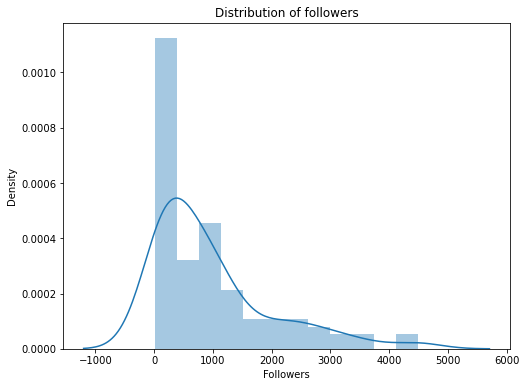

In [58]:
#Distribution of followers variable
plt.figure(figsize=(8, 6))
sns.distplot(df_copy['Followers'])
plt.title("Distribution of followers")
plt.show()

In [59]:
#Distribution seems to be right skewed.Most of the account has followers between 0-3000 or more

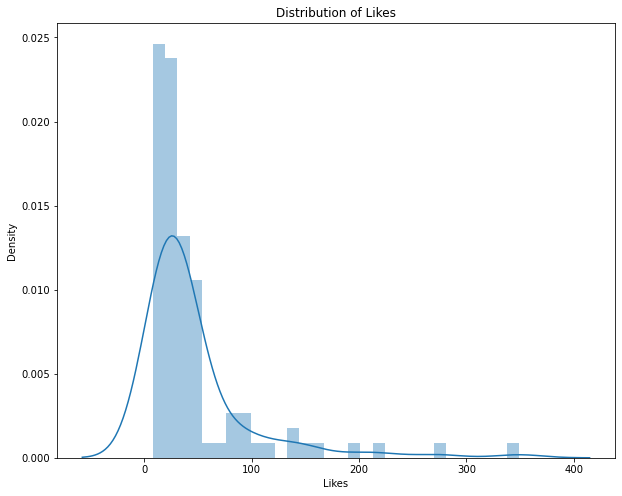

In [60]:
## Distribution of Likes Variable

plt.figure(figsize=(10, 8))
plt.title("Distribution of Likes")
sns.distplot(df_copy['Likes'])
plt.show()

In [61]:
#Distribution of data again seems to be right skewed.

In [62]:
#Times since posted will be better if in type of int/float, so it will be changed
Time_since_posted_in_hours=[]

for i in df_copy['Time since posted']:
    Time_since_posted_in_hours.append(i.replace('hours', ''))

df_copy.rename(columns={'USERNAME':'Username'}, inplace=True)
se = pd.Series(Time_since_posted_in_hours)
df_copy['Times since posted (hours)'] = se.values
df_copy['Times since posted (hours)'] = pd.to_numeric(df_copy['Times since posted (hours)'])
df_copy = df_copy.drop('Time since posted', axis=1)

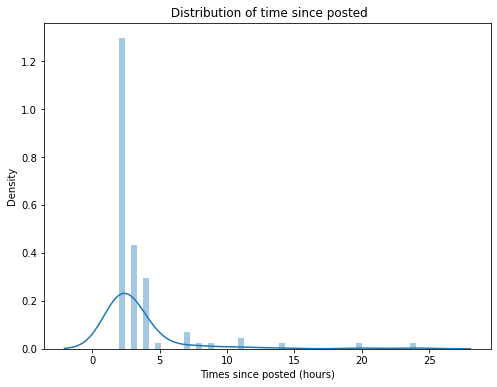

In [63]:
plt.figure(figsize=(8,6))
sns.distplot(df_copy['Times since posted (hours)'])
plt.title(' Distribution of time since posted')
plt.show()

In [64]:
#The Time_since_posted_hours distribution is right skewed

In [65]:
## Plotting Word-Cloud for Caption Data
text = " ".join(i for i in df_copy.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

TypeError: sequence item 52: expected str instance, float found

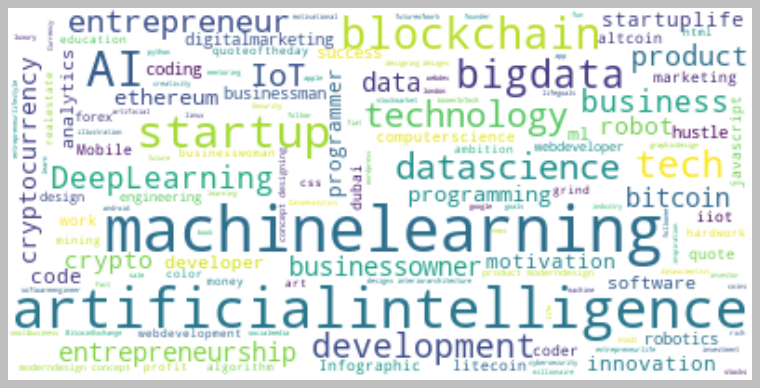

In [66]:
## Plotting Word-Cloud for Hashtag Related Data

text = " ".join(i for i in df_copy.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#From wordcloud above we know that words like 'artificialintelligence', 'machinelearning', 'AI' are the top three words on hashtags

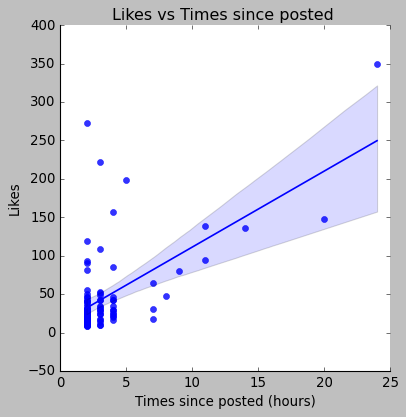

In [67]:
## Bivariate Analysis
sns.lmplot(x='Times since posted (hours)', y='Likes', data=df_copy, fit_reg=True, scatter_kws={"marker": "D", "s": 30})

plt.title('Likes vs Times since posted ')
plt.xlabel('Times since posted (hours)')
plt.ylabel('Likes')
plt.show()


#There is linear relationship between times since posted and likes. Some data shows no relationship between these two

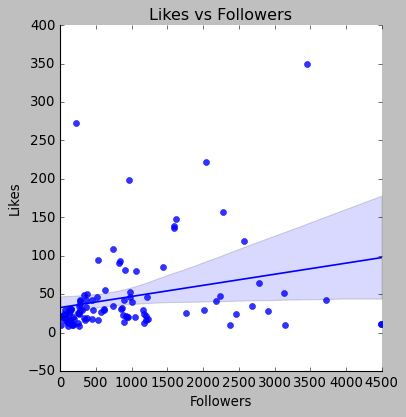

In [68]:
sns.lmplot(x='Followers', y='Likes', data=df_copy, fit_reg=True, scatter_kws={"marker": "D", "s": 30})

plt.title('Likes vs Followers')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.show()

There is linear relationship between these two variables

<AxesSubplot:>

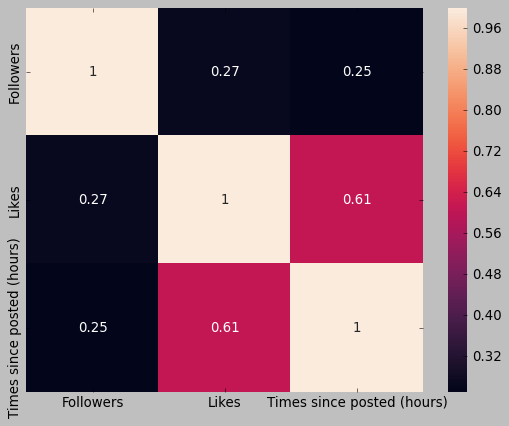

In [69]:
#Correlation
sns.heatmap(df_copy.corr(),annot=True)

In [70]:
#There is strong correlation between likes and times since posted in hours

### Model Building

In [71]:
#Define x variables and y variable
X = df_copy[['Followers', 'Times since posted (hours)']]
y = df_copy['Likes']


In [72]:
# Define which columns should be ordinal-encoded and which should be scaled
#Segreggate numerical and categorical features
numerical_columns = df_copy.columns[df_copy.dtypes!='object']
categorical_columns = df_copy.columns[df_copy.dtypes=='object']
print(f"Numerical Columns : {numerical_columns} ")
print(f"Categorical Columns : {categorical_columns} ")

Numerical Columns : Index(['Followers', 'Likes', 'Times since posted (hours)'], dtype='object') 
Categorical Columns : Index(['Username', 'Caption', 'Hashtags'], dtype='object') 


In [73]:
df_copy[categorical_columns].describe()

,Username,Caption,Hashtags
count,100,94,100
unique,95,94,98
top,mikequindazzi,simple elegance from @mumzynotjess featuring I...,#DeepLearning #MachineLearning#ArtificialIntel...
freq,4,1,2


In [74]:
## Independent and dependent features
#Define x variables and y variable
x = df_copy[['Followers', 'Times since posted (hours)']]
y = df_copy['Likes']
df.head()

#Split train set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [75]:
#Numerical Pipeline
num_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
)

#Categorical Pipeline

cat_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('ordinal_encoder',OneHotEncoder()),
        ('scaler',StandardScaler())
    ]
)

#here we will combine numerical and categorical pipelines
preprocessor = ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_columns),
    ('cat_pipeline',cat_pipeline,categorical_columns)
])

In [76]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [77]:
#Train multiple Models
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'DecisionTree':DecisionTreeRegressor(),
    'RandomForest':RandomForestRegressor(),
    'GradientBoosting':GradientBoostingRegressor(),
    
    
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 23.25966876579312
MAE: 18.497853347786005
R2 score 61.83678779549551


Lasso
Model Training Performance
RMSE: 23.16878349504091
MAE: 18.453067454449553
R2 score 62.13444444044151


Ridge
Model Training Performance
RMSE: 23.248301083189165
MAE: 18.49234036432478
R2 score 61.874081643124555


Elasticnet
Model Training Performance
RMSE: 22.834138209914197
MAE: 18.265671047336284
R2 score 63.22038985632944


DecisionTree
Model Training Performance
RMSE: 23.170023737579555
MAE: 16.55
R2 score 62.13039038816615


RandomForest
Model Training Performance
RMSE: 21.044210842889782
MAE: 14.203
R2 score 68.76056580448673


GradientBoosting
Model Training Performance
RMSE: 14.595799388551859
MAE: 11.32918578125361
R2 score 84.97226106358329


